In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import f1_score

In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
cdc_diabetes_health_indicators = fetch_ucirepo(id=891) 
  
# data (as pandas dataframes) 
feature_data = cdc_diabetes_health_indicators.data.features 
target_data = cdc_diabetes_health_indicators.data.targets 

In [4]:
cdc_diabetes_health_indicators.metadata

{'uci_id': 891,
 'name': 'CDC Diabetes Health Indicators',
 'repository_url': 'https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators',
 'data_url': 'https://archive.ics.uci.edu/static/public/891/data.csv',
 'abstract': 'The Diabetes Health Indicators Dataset contains healthcare statistics and lifestyle survey information about people in general along with their diagnosis of diabetes. The 35 features consist of some demographics, lab test results, and answers to survey questions for each patient. The target variable for classification is whether a patient has diabetes, is pre-diabetic, or healthy. ',
 'area': 'Health and Medicine',
 'tasks': ['Classification'],
 'characteristics': ['Tabular', 'Multivariate'],
 'num_instances': 253680,
 'num_features': 21,
 'feature_types': ['Categorical', 'Integer'],
 'demographics': ['Sex', 'Age', 'Education Level', 'Income'],
 'target_col': ['Diabetes_binary'],
 'index_col': ['ID'],
 'has_missing_values': 'no',
 'missing_values_symbol

In [5]:
cdc_diabetes_health_indicators.metadata

{'uci_id': 891,
 'name': 'CDC Diabetes Health Indicators',
 'repository_url': 'https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicators',
 'data_url': 'https://archive.ics.uci.edu/static/public/891/data.csv',
 'abstract': 'The Diabetes Health Indicators Dataset contains healthcare statistics and lifestyle survey information about people in general along with their diagnosis of diabetes. The 35 features consist of some demographics, lab test results, and answers to survey questions for each patient. The target variable for classification is whether a patient has diabetes, is pre-diabetic, or healthy. ',
 'area': 'Health and Medicine',
 'tasks': ['Classification'],
 'characteristics': ['Tabular', 'Multivariate'],
 'num_instances': 253680,
 'num_features': 21,
 'feature_types': ['Categorical', 'Integer'],
 'demographics': ['Sex', 'Age', 'Education Level', 'Income'],
 'target_col': ['Diabetes_binary'],
 'index_col': ['ID'],
 'has_missing_values': 'no',
 'missing_values_symbol

In [6]:
feature_data.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1,1,1,40,1,0,0,0,0,1,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,25,1,0,0,1,0,0,...,0,1,3,0,0,0,0,7,6,1
2,1,1,1,28,0,0,0,0,1,0,...,1,1,5,30,30,1,0,9,4,8
3,1,0,1,27,0,0,0,1,1,1,...,1,0,2,0,0,0,0,11,3,6
4,1,1,1,24,0,0,0,1,1,1,...,1,0,2,3,0,0,0,11,5,4


In [7]:
feature_data.describe(include='all')

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,0.811420,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,0.391175,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [9]:
target_data.head()

,Diabetes_binary
0,0
1,0
2,0
3,0
4,0


In [16]:
X = feature_data
y = target_data.Diabetes_binary

In [17]:
X_train_test, X_test, y_train_test, y_test = train_test_split(X, y, test_size=0.2)

X_train, X_val, y_train, y_val = train_test_split(X_train_test, y_train_test, test_size=0.25)

In [18]:
# Train the model
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [19]:
# Predict on the validation set
y_val_pred = model.predict(X_val)

In [20]:
# Evaluate the model
f1 = f1_score(y_val, y_val_pred, average='weighted')
print(f"F1-Score on Validation Set: {f1}")

F1-Score on Validation Set: 0.7973149770520759


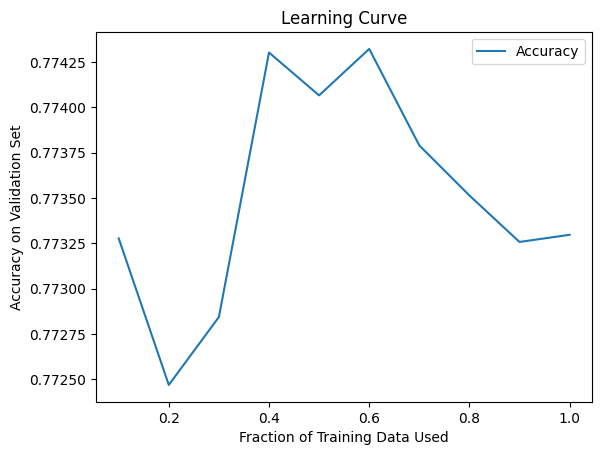

In [21]:
train_sizes = np.linspace(0.1, 1.0, 10)
train_scores = []

for size in train_sizes:
    subset_size = int(size * X_train.shape[0])
    X_subset, y_subset = X_train[:subset_size], y_train[:subset_size]
    model.fit(X_subset, y_subset)
    train_scores.append(model.score(X_val, y_val))

# Plotting the learning curve over accuracy in validation set
plt.plot(train_sizes, train_scores, label='Accuracy')
plt.title('Learning Curve')
plt.xlabel('Fraction of Training Data Used')
plt.ylabel('Accuracy on Validation Set')
plt.legend()
plt.show()

In [22]:
# Predict on the test set
y_test_pred = model.predict(X_test)

# Evaluate the model
f1 = f1_score(y_test, y_test_pred, average='weighted')
print(f"F1-Score on Test Set: {f1}")

F1-Score on Test Set: 0.7953195049112539


Since the f1-score for the validation set and test set are comparable, we can state that there are no signs of overfitting.

In [23]:
print(metrics.classification_report(y_test, y_test_pred))
print("Confusion Matrix:\n", metrics.confusion_matrix(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.92      0.80      0.86     43597
           1       0.32      0.57      0.41      7139

    accuracy                           0.77     50736
   macro avg       0.62      0.69      0.63     50736
weighted avg       0.84      0.77      0.80     50736

Confusion Matrix:
 [[35088  8509]
 [ 3087  4052]]


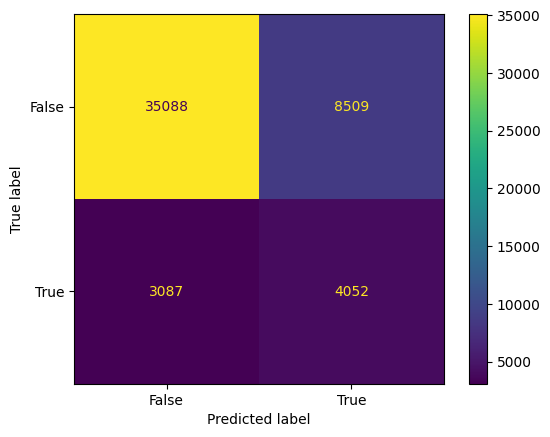

In [25]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = metrics.confusion_matrix(y_test, y_test_pred), display_labels = [False, True])

cm_display.plot()
plt.show()

3087 participants were identified as non-diabetic when they were diabetic or prediabetic in actuality. The FNR from utilizing Naive Bayes is 0.432.